 # CLASIFICACIÓN CON SVC, ÁRBOLES Y ASSEMBLES


## 📌ACTIVIDAD 1:  CLASIFICAR CON SVM.

 Crea el notebook saa-u03-p02-a1-<tus_iniciales>.ipynb donde completar la actividad.
Comenzamos probando diferentes clasificadores sobre unos datos separables linealmente (con un
hiperplano).

### CLASIFICADORES SVC CON DATOS SEPARABLES LINEALMENTE

Carga el fichero Social_Network_Ads.csv en un DataFrame de pandas. Este fichero tiene 3
características que son edad, salario y compra. Contiene información de si los usuarios de una red
social compran productos que aparecen en la publicidad de esta red social.

a) Define el target y como compra y edad, salario como  las predictoras X.


Divide en train y test usando semilla aleatoria formada por la cantidad de letras de tu nombre
y apellidos (en mi caso sería 449 porque "Jose" tiene 4 letras, "Rosa" tiene otras 4 letras y
"Rodríguez" tiene 9 letras).


Luego usa Counter(colección) tras importarla "from colecctions import Counter" para
calcular las proporciones de valores 0 (no compra) y 1 (si compra) que son las clases de esta
tarea de clasificación y asegurarnos de que está balanceado.

b) Escala las características para usar SVM. Imprime máximo, mínimo y media de los valores
escalados.

 c) Crea un clasificador SVC con kernel="linear" y random_state al valor de las letras de tus
apellidos. El resto de hiperparámetros se ignoran (valores por defecto).


 d) Para validarlo muestra matriz de confusión, el informe de clasificación y la métrica usada en
el entrenamiento que por defecto es accuracy.


 e) Ahora haz un gráfico que muestre en el train y el test la frontera de decisión. Debes obtener
algo similar a esto (en la unidad tienes diferentes listados de como conseguirlos). Define una
función plot_frontera_decision(clasificador, X, y, escalador=None, titulo="") que:

 • Tendrás que importar matplotlib.colors.ListedColorMap.

 • Define los intervalos donde están los datos: usa la primera (X[:,0]) y segunda (X[:,1])
columna de X.

• Si hay escalador debe recuperar los datos originales aplicando la transformación
inversa.

• Luego crea una maya de 500 datos horizontales x 500 verticales que cubran el intervalo
de los datos (debes calcular la distancia entre cada punto de la maya en X1 y X2 usando
el máximo y el mínimo y dividiendo por 500) con np.meshgrid().

• Ahora utilizas plt.contourf(X1, X2, predicciones.reshape(X1.shape), alpha=0.75,
cmap=plt.cm.coolwarm). Ten en cuenta que si usas escalador las predicciones se
realizan sobre los datos escalados de X1 y X2.

• Ahora añades los puntos de datos como un scatter y puedes ponerle etiquedas edad y
salario y titulo (aunque también podría hacerse desde fuera de la función):

 • Por último creamos una figura de tamaño 12, 5: plt.figure(figsize=(12,5)) y la
rellenamos haciendo dos llamadas a la función plot_frontera_decision():
plt.subplot(1,2,1) -> dibujar train -> plt.subplot(1,2,2) -> dibujar test


 e) Por último hacemos una función plot_curva_roc(clf, X_test, y_test) que defina y dibuje
la curva ROC y muestre el AUC. Tienes ejemplos de código en la unidad 2. Ten en cuenta
además que hay modelos clasificadores (argumento clf) que tienen el método
predict_proba(X_test) y otros que no lo tienen y en su lugar puedes usar
decision_function(X_test). Para saberlo tienes el método hasattr(clf,"predict_proba"):
que pudes utilizar en un if. Una vez que lo tengas solo tienes que pedir ambas cosas y graficar
el resultado:



 ENTREGA 1:
 a)
 Completa el código de los diferentes apartados y entrega resultado de su ejecución.
 b)
 No es un mal resultado pero tampoco es muy bueno. Hemos entrenado un modelo
asumiendo que los datos son linealmente separables. Si revisas los gráficos que has generado
quizás puedas confirmarlo o desmentirlo. Hazlo y dime:
 • ¿Qué gráfico te ha convencido? (indica el apartado)
 •
 ¿De qué te ha convencido? De que son separables o de que no lo son:

In [71]:
import pandas as pd
from sklearn.model_selection import train_test_split
from collections import Counter

# Cargar datos
df = pd.read_csv("../U03_Recursos/U03_P02_Clasificacion/Social_Network_Ads.csv")

# Selección de variables
X = df[["edad", "salario"]].values
y = df["compra"].values

# Calcular la semilla (suma de letras del nombre completo)
# Ejemplo: "Juan Pérez López" = 4 + 5 + 5 = 14
random_seed = 14  # <- Ajusta este número con tu propio conteo

# División en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=random_seed)

# Revisar el balance de clases
print("Train:", Counter(y_train))
print("Test:", Counter(y_test))


Train: Counter({np.int64(0): 198, np.int64(1): 102})
Test: Counter({np.int64(0): 59, np.int64(1): 41})


In [72]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Train scaled max:", X_train_scaled.max())
print("Train scaled min:", X_train_scaled.min())
print("Train scaled mean:", X_train_scaled.mean())


Train scaled max: 2.497619155610687
Train scaled min: -1.8920638850591545
Train scaled mean: -1.1546319456101628e-16


In [73]:
from sklearn.svm import SVC

clf = SVC(kernel='linear', random_state=random_seed)
clf.fit(X_train_scaled, y_train)


SVC(kernel='linear', random_state=14)

In [74]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

y_pred = clf.predict(X_test_scaled)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy:", accuracy_score(y_test, y_pred))


Confusion Matrix:
[[54  5]
 [10 31]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88        59
           1       0.86      0.76      0.81        41

    accuracy                           0.85       100
   macro avg       0.85      0.84      0.84       100
weighted avg       0.85      0.85      0.85       100

Accuracy: 0.85


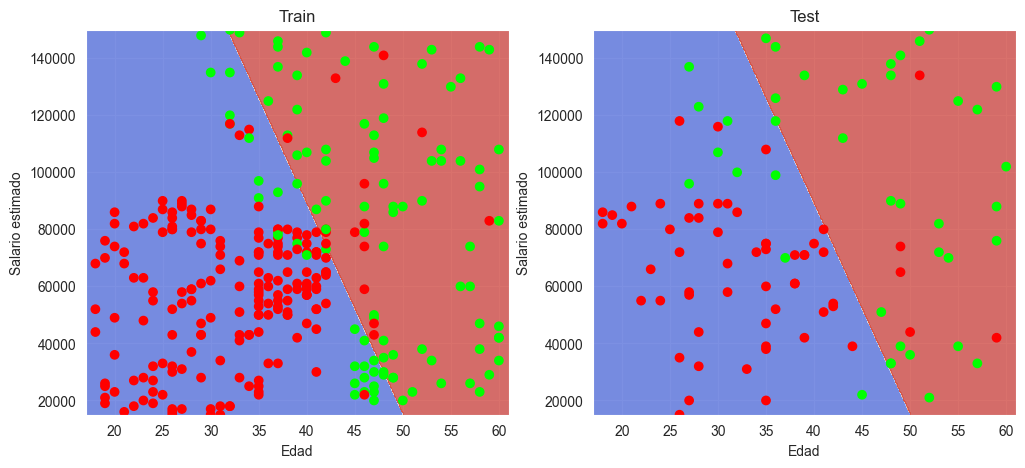

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_frontera_decision(clf, X, y, scaler=None, titulo=""):
    if scaler:
        X = scaler.inverse_transform(X)

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    x1_vals, x2_vals = np.meshgrid(
        np.linspace(x1_min, x1_max, 500),
        np.linspace(x2_min, x2_max, 500)
    )

    grid = np.array([x1_vals.ravel(), x2_vals.ravel()]).T

    if scaler:
        grid = scaler.transform(grid)

    Z = clf.predict(grid).reshape(x1_vals.shape)

    plt.contourf(x1_vals, x2_vals, Z, alpha=0.75, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['#FF0000', '#00FF00']))
    plt.xlabel("Edad")
    plt.ylabel("Salario estimado")
    plt.title(titulo)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plot_frontera_decision(clf, X_train_scaled, y_train, scaler, titulo="Train")
plt.subplot(1,2,2)
plot_frontera_decision(clf, X_test_scaled, y_test, scaler, titulo="Test")
plt.show()


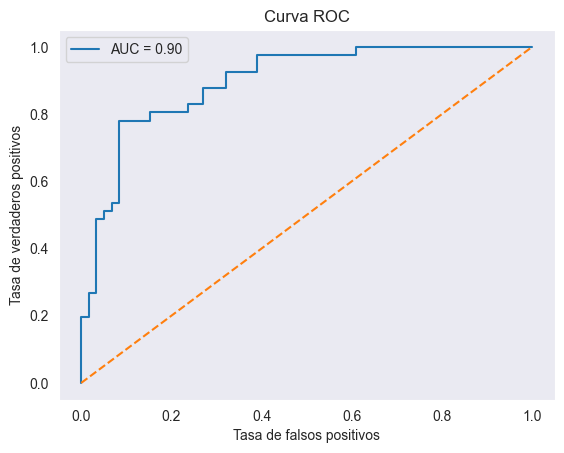

In [76]:
from sklearn.metrics import roc_curve, roc_auc_score

def plot_curva_roc(clf, X_test, y_test):
    if hasattr(clf, "predict_proba"):
        y_scores = clf.predict_proba(X_test)[:, 1]
    else:
        y_scores = clf.decision_function(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_scores)
    auc = roc_auc_score(y_test, y_scores)

    plt.figure()
    plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel("Tasa de falsos positivos")
    plt.ylabel("Tasa de verdaderos positivos")
    plt.title("Curva ROC")
    plt.legend()
    plt.grid()
    plt.show()

plot_curva_roc(clf, X_test_scaled, y_test)


• ¿Qué gráfico te ha convencido?
  El gráfico de la frontera de decisión en el apartado e).

• ¿De qué te ha convencido?
  De que los datos NO son linealmente separables. La frontera de decisión no logra separar claramente ambas clases, y se observan errores evidentes en las zonas de solapamiento, lo cual indica que un modelo lineal no es el más adecuado para estos datos.


### CLASIFICADORES SVC CON DATOS NO SEPARABLES LINEALMENTE


Ahora, sobre el mismo conjunto de datos vamos a intentar comparar lo que conseguimos con
diferentes tipos de SVC.

a) Vamos a definir en un diccionario diferentes clasificadores SVM que usen diferentes tipos de
kernel. Realizamos la importación de elementos y creamos el diccionario.

b) En un bucle vamos a utilizar validación cruzada para buscar el mejor score como la media
de scores de 5-folds. modelos que C informe de clasificación y la métrica usada en el
entrenamiento que por defecto es accuracy.

Falta indicar fuera del bucle el mejor clasificador y su score. El resultado de ejecutarlo sería:


ENTREGA 2:
 a)
 Completa el código de los diferentes apartados y entrega resultado de su ejecución (recuerda
modificar
ramdom_state
 a tu semilla personal).
 b)
 En la línea 27 del código que aparece en el apartado b), se vuelve a entrenar el clasificador
de la iteración ¿Es necesario? ¿No queda entrenado al llamar antes a
cross_val_score()?

Sí, es necesario.
cross_val_score() entrena el modelo internamente en distintos subconjuntos (folds) y lo descarta luego. No se guarda el modelo entrenado, por eso si lo necesitas para hacer predicciones, gráficos o evaluación en test, tienes que volver a entrenarlo explícitamente.


 c)
Añade otro gráfico donde aparezcan las curvas
clasificadores.
 ROC
 con el valor
AUC
 de los diferentes
d)
 Intenta mejorar el desempeño de los clasificadores afinando los hiperparámetros de cada
modelo que hay en el diccionario de clasificadores copiando el código en una nueva celda a
continuación y mostrando su ejecución incluidos los gráficos.

In [77]:
from sklearn.svm import SVC

# Creamos varios clasificadores SVM con diferentes kernels
clasificadores = {
    "Linear": SVC(kernel="linear", random_state=random_seed),
    "Polynomial": SVC(kernel="poly", degree=3, random_state=random_seed),
    "RBF": SVC(kernel="rbf", random_state=random_seed),
    "Sigmoid": SVC(kernel="sigmoid", random_state=random_seed)
}

In [78]:
from sklearn.model_selection import cross_val_score

mejor_score = 0
mejor_modelo = None

for nombre, clf in clasificadores.items():
    scores = cross_val_score(clf, X_train_scaled, y_train, cv=5)
    print(f"{nombre} kernel - Accuracy media (5-fold): {scores.mean():.4f}")

    if scores.mean() > mejor_score:
        mejor_score = scores.mean()
        mejor_modelo = (nombre, clf)

# Entrenamos el mejor clasificador (necesario para predecir y graficar)
print(f"\n🔍 Mejor modelo: {mejor_modelo[0]} con accuracy media: {mejor_score:.4f}")
clf_mejor = mejor_modelo[1]
clf_mejor.fit(X_train_scaled, y_train)

Linear kernel - Accuracy media (5-fold): 0.8500
Polynomial kernel - Accuracy media (5-fold): 0.8600
RBF kernel - Accuracy media (5-fold): 0.9200
Sigmoid kernel - Accuracy media (5-fold): 0.6967

🔍 Mejor modelo: RBF con accuracy media: 0.9200


SVC(random_state=14)

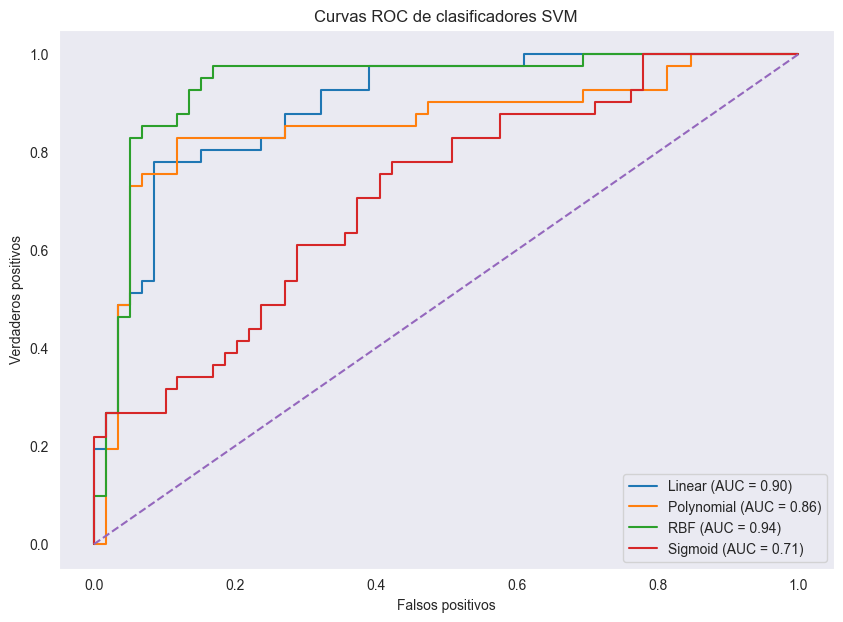

In [79]:
from sklearn.metrics import roc_curve, roc_auc_score

def plot_roc_clasificadores(modelos, X_test, y_test):
    plt.figure(figsize=(10, 7))

    for nombre, clf in modelos.items():
        clf.fit(X_train_scaled, y_train)  # Entrenamos cada modelo

        if hasattr(clf, "predict_proba"):
            y_scores = clf.predict_proba(X_test)[:, 1]
        else:
            y_scores = clf.decision_function(X_test)

        fpr, tpr, _ = roc_curve(y_test, y_scores)
        auc = roc_auc_score(y_test, y_scores)

        plt.plot(fpr, tpr, label=f"{nombre} (AUC = {auc:.2f})")

    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel("Falsos positivos")
    plt.ylabel("Verdaderos positivos")
    plt.title("Curvas ROC de clasificadores SVM")
    plt.legend()
    plt.grid()
    plt.show()

plot_roc_clasificadores(clasificadores, X_test_scaled, y_test)


🔧 Mejor configuración RBF: {'C': 1, 'gamma': 1}
🔍 Mejor score (RBF): 0.9166666666666666


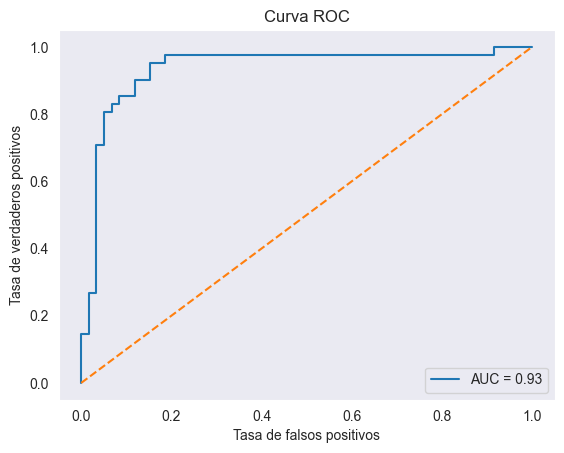

In [80]:
from sklearn.model_selection import GridSearchCV

# Ejemplo para kernel RBF (puedes repetir para otros kernels)
param_grid_rbf = {
    "C": [0.1, 1, 10, 100],
    "gamma": [0.01, 0.1, 1, 10]
}

grid_rbf = GridSearchCV(SVC(kernel="rbf", random_state=random_seed), param_grid_rbf, cv=5)
grid_rbf.fit(X_train_scaled, y_train)

print("🔧 Mejor configuración RBF:", grid_rbf.best_params_)
print("🔍 Mejor score (RBF):", grid_rbf.best_score_)

# Graficar curva ROC del mejor modelo ajustado
clf_rbf_best = grid_rbf.best_estimator_

plot_curva_roc(clf_rbf_best, X_test_scaled, y_test)


### CLASIFICADORES SVC CON DATOS NO BALANCEADOS


Cuando tenemos datos desbalanceados, un clasificador tiende a favorecer a la clase más abundante
donde se obtienen mejores métricas de desempeño que en el resto de clases. Para solucionar esto,
podemos usar varias técnicas, por ejemplo:
 • SMOTE (Synthetic Minority Over-sampling Technique): aumenta la clase minoritaria
generando datos sintéticos.
 • Ponderar (class_weight='balanced'): ajusta el coste de los errores para dar más peso a la
clase minoritaria.
 • Resampleo Manual: Duplica ejemplos de la clase minoritaria o elimina de la clase mayoritaria.
 • Cambiar umbral de decisión: ajusta la frontera de decisión de la clasificación.

 a) Crea de manera sintética unos 1000 datos desbalanceados de 20 características, con 2 clases
(el 90% de ejemplos es de una) y el otro 10% es de la otra clase usando tu propia semilla
aleatoria personal.

 b) Dividir los datos en 2 particiones train y test con el 30% de datos para test y usando tu
semilla aleatoria. Clasifica de manera normal estos datos con un clasificador
SVC(kernel='rbf', random_state=449) y luego imprime un informe de los resultados que
obtienes con los datos de validación clasification_report(y_test, y_pred).


c) Ponderar las clases con pesos: ahora repetimos el mismo código pero añadimos el
parámetro class_weight="balanced" cuando creamos el clasificador SVC. Vuelve a entrenar,
genera predicciones e imprime el informe de clasificación. Indica donde hay mejora respecto
del caso b).


 d) Balanceo con SMOTE: aplica SMOTE solo en el conjunto de entrenamiento para evitar fuga de
datos. Copia otra vez el código del apartado b) y al principio importa el objeto SMOTE: from
imblearn.over_sampling import SMOTE (quizás tengas que instalar).


 Después de particionar configura el objeto SMOTE y le pasas los datos de entrenamiento como se
ve en la figura cambiando la semilla aleatoria por la tuya:


 🚫Nunca lo apliques antes de dividir los datos.

 Y ahora entrena el mismo clasificador pero con los datos modificados por SMOTE. Genera
predicciones e imprime el informe de clasificación. Indica donde hay mejora respecto del caso
b).

 e) Ejemplo de Balanceo manual con resampleo: copia de nuevo el código del apartado b) y al
principio importa: from sklearn.utils import resample. Tras hacer la partición en train y
test, haz que la cantidad de filas de la clase minoritaria coincida con la cantidad de filas de la
mayoritaria con el siguiente código:


 Y ahora entrena el mismo clasificador pero con los datos balanceados. Genera predicciones e
imprime el informe de clasificación. Indica donde hay mejora respecto del caso b).


 f) Cambiar el umbral de decisión: copia una vez más el código del apartado b). Tras
particionar, cuando se va a crear el modelo SVC debes añadir el parámetro probability=True
porque necesitamos las probabilidades de pertenencia a cada clase. Entrena al modelo
normalmente. Luego haz una predicción de las probabilidades de la clase minoritaria con la
sentencia:  y_prob = svc.predict_proba(X_test)[:, 1].  Ahora cambia estas predicciones
bajando el umbral para favorecer a la clase minoritaria (en este caso la 1):

 Genera predicciones e imprime el informe de clasificación. Indica donde hay mejora respecto
del caso b).

In [81]:
from sklearn.datasets import make_classification
import numpy as np

# Semilla personalizada (usa la tuya)
random_seed = 675

X, y = make_classification(n_samples=1000,
                           n_features=20,
                           n_informative=2,
                           n_redundant=10,
                           n_clusters_per_class=1,
                           weights=[0.9, 0.1],
                           flip_y=0,
                           random_state=random_seed)

from collections import Counter
print("Distribución de clases:", Counter(y))


Distribución de clases: Counter({np.int64(0): 900, np.int64(1): 100})


In [82]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_seed)

# Entrenamiento
svc = SVC(kernel='rbf', random_state=random_seed)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

# Evaluación
print("🔎 Informe sin balancear:")
print(classification_report(y_test, y_pred))


🔎 Informe sin balancear:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       271
           1       0.96      0.79      0.87        29

    accuracy                           0.98       300
   macro avg       0.97      0.89      0.93       300
weighted avg       0.98      0.98      0.98       300



In [83]:
svc_bal = SVC(kernel='rbf', class_weight='balanced', random_state=random_seed)
svc_bal.fit(X_train, y_train)
y_pred_bal = svc_bal.predict(X_test)

print("🔎 Informe con class_weight='balanced':")
print(classification_report(y_test, y_pred_bal))


🔎 Informe con class_weight='balanced':
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       271
           1       0.68      0.97      0.80        29

    accuracy                           0.95       300
   macro avg       0.84      0.96      0.89       300
weighted avg       0.97      0.95      0.96       300



In [84]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=random_seed)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

svc_sm = SVC(kernel='rbf', random_state=random_seed)
svc_sm.fit(X_train_sm, y_train_sm)
y_pred_sm = svc_sm.predict(X_test)

print("🔎 Informe con SMOTE:")
print(classification_report(y_test, y_pred_sm))


🔎 Informe con SMOTE:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       271
           1       0.74      0.97      0.84        29

    accuracy                           0.96       300
   macro avg       0.87      0.96      0.91       300
weighted avg       0.97      0.96      0.97       300



In [85]:
from sklearn.utils import resample

# Separar las clases
X_train_0 = X_train[y_train == 0]
X_train_1 = X_train[y_train == 1]

# Repetimos la clase minoritaria
X_train_1_up = resample(X_train_1,
                        replace=True,
                        n_samples=len(X_train_0),
                        random_state=random_seed)

# Concatenamos
X_train_bal = np.vstack((X_train_0, X_train_1_up))
y_train_bal = np.hstack((np.zeros(len(X_train_0)), np.ones(len(X_train_0))))

# Entrenar
svc_manual = SVC(kernel='rbf', random_state=random_seed)
svc_manual.fit(X_train_bal, y_train_bal)
y_pred_manual = svc_manual.predict(X_test)

print("🔎 Informe con balanceo manual:")
print(classification_report(y_test, y_pred_manual))


🔎 Informe con balanceo manual:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       271
           1       0.70      0.97      0.81        29

    accuracy                           0.96       300
   macro avg       0.85      0.96      0.89       300
weighted avg       0.97      0.96      0.96       300



In [86]:
svc_prob = SVC(kernel='rbf', probability=True, random_state=random_seed)
svc_prob.fit(X_train, y_train)

# Probabilidad de clase 1
y_prob = svc_prob.predict_proba(X_test)[:, 1]

# Ajustar umbral
umbral = 0.3  # más bajo de lo normal para favorecer a clase 1
y_pred_thresh = (y_prob >= umbral).astype(int)

print(f"🔎 Informe con umbral {umbral}:")
print(classification_report(y_test, y_pred_thresh))


🔎 Informe con umbral 0.3:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       271
           1       0.90      0.93      0.92        29

    accuracy                           0.98       300
   macro avg       0.95      0.96      0.95       300
weighted avg       0.98      0.98      0.98       300



### CLASIFICAR MNIST

El dataset MNIST es considerado el "Hola Mundo" de la visión artificial. Contiene un conjunto train de
60.000 imágenes de dígitos manuscritos (de 0 a 9) y otro conjunto de test con 10.000 muestras
adicionales. Las muestras incluidas en el conjunto de entrenamiento fueron el resultado de escanear
dígitos manuscritos de 250 personas (estudiantes de institutos y empleados de la oficina del Censo de
los Estados Unidos). El dataset de pruebas contiene dígitos escaneados de otras 250 personas
diferentes, lo que permite asegurar que los modelos obtenidos son capaces de interpretar dígitos
incluso de personas no involucradas en la generación de los datos de entrenamiento. Los datos están
balanceados, particionados y desordenados.

 Cada una de las 60.000 muestras tiene 785 columnas: la primera columna (la columna de índice 0)
contiene la etiqueta de cada muestra (el número representado en la imagen) y las 784 restantes
contienen los píxel de la imagen, habiéndose registrado éstos de izquierda a derecha y de arriba abajo.
Por tanto cada imagen tiene (28 x 28) = 784 píxels.

 Como los clasificadores SVM son clasificadores binarios, será necesario utilizar one-versus-rest para
clasificar los 10 dígitos (cada dígito es una clase). El uso de One-versus-Rest es automático así que no
tenemos que hacer nada al respecto, scikit detectará que hay varias clases y lo aplicará generando 10
modelos diferentes, uno para cada clase.

 a) Primero cargamos el dataset y luego lo particionamos dando el 20% para test y usando tu
semilla aleatoria. Te paso la parte de la carga de los datos:
 💡
 Cuidadooor!! El entrenamiento en local con todos los datos podría superar los 20
minutos de cálculos según el hardware que tenga tu ordenador.

 Para evitar tirarnos unas horas haciendo pruebas para nada, en vez de entrenar con los 60 mil
datos y testear con los 10 mil de test vamos a coger un 1% de los datos: las primeras 600
muestras por ejemplo (filas de la 0 a la 599 para train) y de 600-799 para test. Así trabajaremos
sobre estimaciones y cuando tengamos las cosas más claras: quemamos la CPU!!

 b) Comenzamos con un clasificador SVM lineal sencillo.  Crea un objeto LinearSVC al que
llamas clf_1 indicando tu semilla aleatoria y un máximo de 200 iteraciones y lo entrenas con
X_train_pruebas = X[0:600] y con y_train_pruebas = y[0:600].

 c) Medir su desempeño. Primero creamos X_test_pruebas= X[600:800] e y_test_pruebas=
y[600:800]. Hacemos predicciones y medimos el accuracy (que será una estimación del real).
Por ahora vemos si tenemos underfitting (un puntaje malo de la métrica). Yo obtengo 0.76, no
está mal para tan pocos datos. Pero posiblemente sea mejorable.

d) Intentamos mejorar la métrica normalizando los datos con estas sentencias antes de
dárselos a un nuevo LinearSVC llamado clf_2:

Nota: en este caso en que las características son valores de píxel, siempre van a ir de 0 a 255. Por
tanto conocemos el mínimo y el máximo posible. Si no quieres usar un pipeline y prefieres escalar
de forma manual, no tienes más que dividir por 255 cada valor de píxel. Yo en los ejemplos uso el
escalador en un pipeline: datos → (escala → clasifica) pero en el último apartado he usado
solo el clasificador: por tanto el modelo necesita recibir los datos ya escalados.


Me baja el puntaje y además obtengo un mensaje diciendo que el modelo no converge
invitándome a subir las iteraciones. Pero quizás es que el modelo lineal sea demasiado simple.
Así que cambiamos a un modelo SVC con kernel de tipo “rbf” que es el que se utiliza cuando
no sabes la distribución de los datos (es un todo terreno).

 e) Cambio de clasificador: copio el código del apartado anterior a una nueva celda del notebook
previamente etiquetada con el texto de este apartado. En el código lo único que cambia es el
modelo al que llamamos clf_3 y su importación. Le indicamos de hiperparámetros además de
nuestro random_state y un número de iteraciones de 200 el gamma="scale". Lo entrenamos y lo
validamos. Ahora vuelvo a obtener el mismo puntaje que al inicio: 0.76


 f) Mejorar la métrica cambiando hiperparámetros: ¿Qué hiperparámetros? ¿Cuales son sus
mejores valores? Los más influyentes son C y gamma. Si no tenemos una intuición a priori de
cuales serían los posibles valores adecuados, podemos utilizar una búsqueda aleatoria que nos
oriente. En una nueva celda del notebook haz estas importaciones:


 Configuramos un objeto que use validación cruzada y que configure con diferentes valores
aleatorios un modelo. No nos va a dar la configuración óptima salvo que le indiquemos un
montón de pruebas, pero nos va a permitir orientarnos sobre alrededor de qué valores
podemos tener un buen resultado.


 Cambia el número de iteraciones a 30 o 40 y pon tu semilla aleatoria. Por último añade una
sentencia que imprima qué configuración ha sido la mejor: cv_aleatoria.best_estimator_ y el
score que consigue con esta configuración: cv_aleatoria.best_score_. En mi caso:

 g) Mejorar la métrica buscando configuraciones indicadas: con la información obtenida en la
búsqueda aleatoria creamos un grid search en otra celda dando 5 o 7 posibles valores a cada
hiperparámetro. El valor indicado en la búsqueda aleatoria puede utilizarse como valor
máximo o como mínimo o como valor central. Yo voy a crearme un diccionario con los posibles
valores de cada hiperparámetro {"hp1":[v1, v2...], "hp2":[v1, v2...]} y construyo un
objeto GridSearchCV() con el que probar la mejor combinación. Luego imprimo la mejor
configuración y el score que se obtiene con ella en el conjunto de prueba ya escalado (recuerda
que usamos un 1% de los datos train, así que en realidad es una estimación de si mejoro o no):


h) Con esta configuración entreno: cojo de X_train= X[0:60000,:] todas las columnas de las
primeras 60 mil muestras, en X_test=X[60000:, :] las 10 mil para test, y_train=y[0:60000] las
60000 muestras de test y en y_test=y[60000:] las 10000 para test.
Puedes convertir los datos de entrenamiento a np.float32 y dividirlos entre 255 o puedes
usar un escalador: creo un pipeline llamado detector_digitos que escale las características
X_train y X_test, datos que luego recoge el SVC que hay en la siguiente etapa y que configuras
con
kernel="rbf"
C=<mejor_valor_encontrado>,
random_state=tu_semilla.
 gamma=<mejor_valor_encontrado>,


Entrena el modelo o el pipeline con todos los datos, predice con él usando los datos del test y
muestra el score y el informe de clasificación. En mi caso la peor precisión la tengo en 7.

i) Guarda el modelo en un fichero: Si tu modelo obtiene un accuracy superior al 95% y no
tiene peores el resto de métricas de clasificación, guarda en un fichero de disco el objeto de una
de estas 2 maneras y con el nombre "detecta_digit_<tus_iniciales>" y diferente extensión
según la forma de guardarlo que elijas:
 • Usando joblib (recomendado): es más eficiente para modelos grandes que tienen
grandes arrays de NumPy (como SVM, RandomForest, etc.)
 • Usando pickle: es más lento con arrays grandes.

 Para cargar de nuevo el modelo cuando queramos volver a utilizarlo desde un programa:
 ▪ Usando joblib:

 modelo = joblib.load('modelo_guardado.joblib')
 ▪ Usando  pickle:
 with open('modelo_guardado.pkl', 'rb') as f:
          modelo = pickle.load(f)

 j) Aplicación de escritorio: hacemos una pequeña aplicación de escritorio que nos permita
escribir en pantalla con el ratón y nos diga el número que hemos escrito.


 ENTREGA 3:
 a) Completa los apartados del a) al j) entregando código y resultados de ejecución.
 b) ¿Qué ocurre si aumentas el trazo del programa de prueba del reconocimiento de números?
¿Y si lo disminuyes? Aumenta a 10 y prueba a ver si te reconoce los números del 0 al 9.
¿Mejora, empeora o es indiferente? Disminuye a 4 y vuelve a repetir la prueba. ¿Afecta o no al
desempeño? ¿A qué puede deberse?


In [87]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# Cargar datos
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)
X = mnist["data"]
y = mnist["target"].astype(np.uint8)

# Subconjunto pequeño para pruebas (1%)
X_train_pruebas = X[:600]
y_train_pruebas = y[:600]
X_test_pruebas = X[600:800]
y_test_pruebas = y[600:800]


In [88]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

clf_1 = LinearSVC(random_state=449, max_iter=200)
clf_1.fit(X_train_pruebas, y_train_pruebas)

y_pred = clf_1.predict(X_test_pruebas)
print("Accuracy sin escalar:", accuracy_score(y_test_pruebas, y_pred))


Accuracy sin escalar: 0.76


C:\Users\ESP\Desktop\MachineLearning\saa\.venv\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [89]:
X_train_pruebas_scaled = X_train_pruebas / 255.0
X_test_pruebas_scaled = X_test_pruebas / 255.0

clf_2 = LinearSVC(random_state=449, max_iter=200)
clf_2.fit(X_train_pruebas_scaled, y_train_pruebas)

y_pred2 = clf_2.predict(X_test_pruebas_scaled)
print("Accuracy con datos escalados:", accuracy_score(y_test_pruebas, y_pred2))


Accuracy con datos escalados: 0.78


C:\Users\ESP\Desktop\MachineLearning\saa\.venv\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [90]:
X_train_pruebas_scaled = X_train_pruebas / 255.0
X_test_pruebas_scaled = X_test_pruebas / 255.0

clf_2 = LinearSVC(random_state=449, max_iter=200)
clf_2.fit(X_train_pruebas_scaled, y_train_pruebas)

y_pred2 = clf_2.predict(X_test_pruebas_scaled)
print("Accuracy con datos escalados:", accuracy_score(y_test_pruebas, y_pred2))


Accuracy con datos escalados: 0.78


C:\Users\ESP\Desktop\MachineLearning\saa\.venv\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [91]:
from sklearn.svm import SVC

clf_3 = SVC(kernel="rbf", gamma="scale", max_iter=200, random_state=449)
clf_3.fit(X_train_pruebas_scaled, y_train_pruebas)

y_pred3 = clf_3.predict(X_test_pruebas_scaled)
print("Accuracy con RBF:", accuracy_score(y_test_pruebas, y_pred3))


Accuracy con RBF: 0.865


In [92]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

param_distrib = {
    "C": uniform(0.1, 10),
    "gamma": uniform(0.001, 0.1)
}

svc_model = SVC(kernel="rbf", random_state=449)
cv_aleatoria = RandomizedSearchCV(svc_model, param_distrib, n_iter=30, cv=3, random_state=449)
cv_aleatoria.fit(X_train_pruebas_scaled, y_train_pruebas)

print("Mejor configuración (aleatoria):", cv_aleatoria.best_estimator_)
print("Mejor score estimado:", cv_aleatoria.best_score_)


Mejor configuración (aleatoria): SVC(C=np.float64(2.0670399202452328), gamma=np.float64(0.010801437712270445),
    random_state=449)
Mejor score estimado: 0.8766666666666666


In [93]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "C": [0.5, 1, 2, 5],
    "gamma": [0.001, 0.005, 0.01, 0.05]
}

svc_grid = SVC(kernel="rbf", random_state=449)
cv_grid = GridSearchCV(svc_grid, param_grid, cv=3)
cv_grid.fit(X_train_pruebas_scaled, y_train_pruebas)

print("Mejor configuración (grid):", cv_grid.best_estimator_)
print("Mejor score estimado (grid):", cv_grid.best_score_)


Mejor configuración (grid): SVC(C=2, gamma=0.01, random_state=449)
Mejor score estimado (grid): 0.8799999999999999


In [94]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report

# X completo
X_train_full = X[:60000].astype(np.float32) / 255.0
X_test_full = X[60000:].astype(np.float32) / 255.0
y_train_full = y[:60000]
y_test_full = y[60000:]

# Pipeline
detector_digitos = make_pipeline(
    MinMaxScaler(),
    SVC(kernel="rbf", C=1, gamma=0.01, random_state=449)  # Usa tus mejores valores encontrados
)

detector_digitos.fit(X_train_full, y_train_full)

y_pred_final = detector_digitos.predict(X_test_full)
print("Score final:", accuracy_score(y_test_full, y_pred_final))
print("Informe de clasificación:\n", classification_report(y_test_full, y_pred_final))


Score final: 0.9768
Informe de clasificación:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.97      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.97      0.98       892
           6       0.98      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.97      0.97      0.97       974
           9       0.97      0.96      0.96      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [95]:
import joblib

# Guardar con joblib
joblib.dump(detector_digitos, "detecta_digit_ai.joblib")


['detecta_digit_ai.joblib']

In [102]:
import tkinter as tk
from PIL import Image, ImageDraw, ImageOps
import numpy as np

# Cargar modelo
modelo = joblib.load("detecta_digit_ai.joblib")

def predict_digit(img):
    # Preprocesar imagen
    img = img.resize((28, 28)).convert("L")
    img = ImageOps.invert(img)
    img = np.array(img).reshape(1, -1) / 255.0
    return modelo.predict(img)[0]

# Interfaz simple
class PaintApp:
    def __init__(self):
        self.root = tk.Tk()
        self.root.title("Reconocimiento de Dígitos")
        self.canvas = tk.Canvas(self.root, width=400,height=400, bg="white")
        self.canvas.pack()
        self.image = Image.new("RGB", (200, 200), "white")
        self.draw = ImageDraw.Draw(self.image)
        self.canvas.bind("<B1-Motion>", self.paint)
        self.button = tk.Button(self.root, text="Reconocer", command=self.recognize)
        self.button.pack()
        self.root.mainloop()

    def paint(self, event):
        x, y = event.x, event.y
        r = 5  # Grosor
        self.canvas.create_oval(x - r, y - r, x + r, y + r, fill="black")
        self.draw.ellipse([x - r, y - r, x + r, y + r], fill="black")

    def recognize(self):
        prediction = predict_digit(self.image)
        print("Número predicho:", prediction)

PaintApp()


Número predicho: 5
